## Evaluate a single prediction agains ground truth

In [62]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [48]:
# Sample HTML code
f = open(os.path.expanduser("~/Downloads/pdf2charinfo/samples/FinalTest/13/output2.html"))
pred = f.read()
g = open(os.path.expanduser("~/Downloads/pdf2charinfo/samples/FinalTest/13/13.html"))
true = g.read()



[1.0, 0.925, 0.8943089430894309, 0.8846153846153846, 1.0, 1.0, 1.0, 0.9, 0.9459459459459459, 1.0, 0.972972972972973, 0.9411764705882353, 0.9428571428571428, 0.6346153846153846, 1.0, 1.0, 0.8698630136986302, 0.8378378378378378, 0.9210526315789473, 0.8846153846153846, 0.966542750929368, 0.9047619047619048, 0.8214285714285714, 0.9836065573770492, 0.8529411764705882, 0.9661016949152542, 0.8229166666666666, 0.8142857142857143, 0.9607843137254902, 0.7076923076923076, 0.9459459459459459, 0.9367088607594937, 0.537037037037037, 0.5714285714285714]
0.8925600937011549


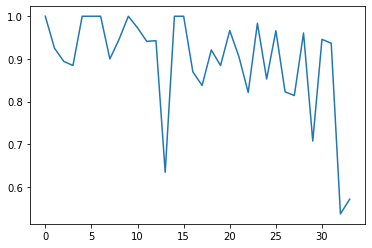

In [67]:
from metric import TEDS
teds = TEDS()
# Initialize TEDS object
ans = []
for i in range(1,38):
    # Evaluate
    try:
        f = open(os.path.expanduser("~/Downloads/pdf2charinfo/samples/FinalTest/"+str(i)+"/output2.html"))
        pred = f.read()
        f.close()
        g = open(os.path.expanduser("~/Downloads/pdf2charinfo/samples/FinalTest/"+str(i)+"/"+str(i)+"_noh.html"))
        true = g.read()
        g.close()
        score = teds.structevaluate(pred, true)
        ans+= [score]
    except:
        pass
print(ans)
plt.plot(ans)
print(np.mean(ans))

## Batch evaluation with parallel threads

In [7]:
import json
import pprint
from metric import TEDS

In [8]:
# Load sample ground truth and predictions
with open('sample_pred.json') as fp:
    pred_json = json.load(fp)
with open('sample_gt.json') as fp:
    true_json = json.load(fp)

In [9]:
# Initialize TEDS object, using 4 parallel threads
teds = TEDS(n_jobs=4)
# Evaluate
scores = teds.batch_evaluate(pred_json, true_json)
# Print results
pp = pprint.PrettyPrinter()
pp.pprint(scores)

100%|██████████| 19.0/19.0 [00:10<00:00, 1.50s/it]
19it [00:00, 112400.25it/s]

{'PMC2094709_004_00.png': 1.0,
 'PMC2871264_002_00.png': 1.0,
 'PMC2915972_003_00.png': 0.9298260149130074,
 'PMC3160368_005_00.png': 0.994615695248351,
 'PMC3568059_003_00.png': 0.9609420535891124,
 'PMC3707453_006_00.png': 0.8538903625110521,
 'PMC3765162_003_01.png': 0.9867342100509474,
 'PMC3872294_001_00.png': 0.9863636363636363,
 'PMC4196076_004_00.png': 0.9958653089334908,
 'PMC4219599_004_00.png': 0.6029978075326913,
 'PMC4297392_007_00.png': 0.8070175438596492,
 'PMC4311460_007_00.png': 0.6576923076923077,
 'PMC4357206_002_00.png': 0.9295181638546892,
 'PMC4445578_009_01.png': 0.6754965084868096,
 'PMC4969833_016_01.png': 1.0,
 'PMC5303243_003_00.png': 0.6494374120956399,
 'PMC5451934_004_00.png': 0.9978213507625272,
 'PMC5755158_010_01.png': 1.0,
 'PMC5849724_006_00.png': 0.9653439200120101,
 'PMC6022086_007_00.png': 1.0}
